In [219]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

In [220]:
data = pd.read_csv('cases_deaths_county_data.csv')
data = data[data['County Name'] != "Statewide Unallocated"]
delete_list = []
for i in range(5, len(data.keys()) - 1):
    if int(data.keys()[i][:4]) != 2022:
        delete_list.append(i)
    elif int(data.keys()[i][5:7]) < 6:
        delete_list.append(i)
may_31_cases_index = data.keys().get_loc('2022-05-31,cases')
may_31_deaths_index = data.keys().get_loc('2022-05-31,deaths')
delete_list.remove(may_31_cases_index)
delete_list.remove(may_31_deaths_index)

new_data = data.drop(data.columns[delete_list],axis = 1)
new_data

,Unnamed: 0,countyFIPS,County Name,State,StateFIPS,"2022-05-31,cases","2022-06-01,cases","2022-06-02,cases","2022-06-03,cases","2022-06-04,cases",...,"2022-12-23,deaths","2022-12-24,deaths","2022-12-25,deaths","2022-12-26,deaths","2022-12-27,deaths","2022-12-28,deaths","2022-12-29,deaths","2022-12-30,deaths","2022-12-31,deaths",population
1,1,1001,Autauga County,AL,1,15963,15969,15978,15978,15978,...,230,230,230,230,230,230,230,230,230,55869
2,2,1003,Baldwin County,AL,1,56512,56580,56648,56648,56648,...,719,719,719,719,719,719,719,719,719,223234
3,3,1005,Barbour County,AL,1,5707,5710,5714,5714,5714,...,103,103,103,103,103,103,103,103,103,24686
4,4,1007,Bibb County,AL,1,6500,6508,6512,6512,6512,...,108,108,108,108,108,108,108,108,108,22394
5,5,1009,Blount County,AL,1,15073,15077,15084,15084,15084,...,260,260,260,260,260,260,260,260,260,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,3188,56037,Sweetwater County,WY,56,11178,11178,11178,11178,11178,...,136,136,136,136,136,136,136,136,136,42343
3189,3189,56039,Teton County,WY,56,10229,10229,10229,10229,10229,...,16,16,16,16,16,16,16,16,16,23464
3190,3190,56041,Uinta County,WY,56,5681,5681,5681,5681,5681,...,43,43,43,43,43,43,43,43,43,20226
3191,3191,56043,Washakie County,WY,56,2369,2369,2369,2369,2369,...,47,47,47,47,47,47,47,47,47,7805


In [221]:
#drop everything except the cases and deaths data
#add all the rows together to get data for entire country
US_data = new_data.drop(new_data.columns[[0, 1, 2, 3, 4, -1]], axis=1).sum() 
US_data

2022-05-31,cases     81268496
2022-06-01,cases     81427445
2022-06-02,cases     81494654
2022-06-03,cases     81701504
2022-06-04,cases     81712058
                       ...   
2022-12-27,deaths      990276
2022-12-28,deaths      990493
2022-12-29,deaths      990707
2022-12-30,deaths      992217
2022-12-31,deaths      992220
Length: 430, dtype: int64

In [222]:
#separate cases and deaths data
US_cases, US_deaths = np.array_split(US_data, 2)
US_cases = US_cases.tolist()
US_deaths = US_deaths.tolist()
US_cases

[81268496,
 81427445,
 81494654,
 81701504,
 81712058,
 81737066,
 81887818,
 81924905,
 82093626,
 82149139,
 82249694,
 82260785,
 82344152,
 82420126,
 82487610,
 82690943,
 82763388,
 83004605,
 83034385,
 83064890,
 83117180,
 83191445,
 83351829,
 83424738,
 83522917,
 83549016,
 83589701,
 83660856,
 83719519,
 83935614,
 84033024,
 84249253,
 84269003,
 84304891,
 84345529,
 84452490,
 84620664,
 84738547,
 84819856,
 84855980,
 84878371,
 84974762,
 85039126,
 85188641,
 85364301,
 85559961,
 85587120,
 85631260,
 85747314,
 85852145,
 86032914,
 86138326,
 86237477,
 86251427,
 86278506,
 86387638,
 86459985,
 86712884,
 86819490,
 87027553,
 87042247,
 87067539,
 87181024,
 87261326,
 87432378,
 87543057,
 87618564,
 87629763,
 87651673,
 87718679,
 87820203,
 87965371,
 88068436,
 88260285,
 88269578,
 88289700,
 88417089,
 88492810,
 88621213,
 88700135,
 88760694,
 88779172,
 88783442,
 88854136,
 88927689,
 89056931,
 89136063,
 89274181,
 89281656,
 89170329,
 89220136,

In [223]:
for i in reversed(range(1, len(US_cases))):
    diff1 = US_cases[i] - US_cases[i - 1]
    diff2 = US_deaths[i] - US_deaths[i - 1]

    if diff1 < 0:
        US_cases[i] = 0
    else:
        US_cases[i] = diff1
    
    if diff2 < 0:
        US_deaths[i] = 0
    else:
        US_deaths[i] = diff2

US_cases.pop(0) #first value was only used to calcuate the number of new cases of the first day of june
US_deaths.pop(0)
US_cases[0]

158949

In [224]:
#separate data into weeks to make calculations easier
US_weekly_cases_data = []
US_weekly_deaths_data = []
holder = []
for i in range(len(US_cases)):
    if((i + 1) % 7 != 0):
        holder.append(US_cases[i])
    else:
        holder.append(US_cases[i])
        US_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    US_weekly_cases_data.append(holder)
    holder = []

for i in range(len(US_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(US_deaths[i])
    else:
        holder.append(US_deaths[i])
        US_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    US_weekly_deaths_data.append(holder)
    holder = []

US_weekly_cases_data[0]

[158949, 67209, 206850, 10554, 25008, 150752, 37087]

In [225]:
US_weekly_cases_means = []
US_weekly_cases_medians = []
US_weekly_cases_modes = []
for i in US_weekly_cases_data:
    US_weekly_cases_means.append(np.mean(i))
    US_weekly_cases_medians.append(np.median(i))
    US_weekly_cases_modes.append(mode(i))

US_weekly_deaths_means = []
US_weekly_deaths_medians = []
US_weekly_deaths_modes = []
for i in US_weekly_deaths_data:
    US_weekly_deaths_means.append(np.mean(i))
    US_weekly_deaths_medians.append(np.median(i))
    US_weekly_deaths_modes.append(mode(i))

In [226]:
#make data sets for the 4 countries
#each country will have a data set for recent cases and recent deaths
new_cases = pd.read_csv('new_cases.csv')
delete_list = []
for i in range(len(new_cases.index)):
    if int(new_cases.iloc[i]['date'][:4]) != 2022:
        delete_list.append(i)
    elif int(new_cases.iloc[i]['date'][5:7]) < 6:
        delete_list.append(i)
recent_cases = new_cases.drop(delete_list)

russia_cases = recent_cases[['Russia']].stack().tolist()
unitedkingdom_cases = recent_cases[['United Kingdom']].stack().tolist()
germany_cases = recent_cases[['Germany']].stack().tolist()


new_deaths = pd.read_csv('new_deaths.csv')
delete_list = []
for i in range(len(new_deaths.index)):
    if int(new_deaths.iloc[i]['date'][:4]) != 2022:
        delete_list.append(i)
    elif int(new_deaths.iloc[i]['date'][5:7]) < 6:
        delete_list.append(i)
recent_deaths = new_deaths.drop(delete_list)

russia_deaths = recent_deaths[['Russia']].stack().tolist()
unitedkingdom_deaths = recent_deaths[['United Kingdom']].stack().tolist()
germany_deaths = recent_deaths[['Germany']].stack().tolist()

In [227]:
#calculate weekly mean, median, and mode for all 6 datasets(two for each country)
#first, group days into groups of seven for calculation

russia_weekly_cases_data = []
russia_weekly_deaths_data = []
holder = []
for i in range(len(russia_cases)):
    if((i + 1) % 7 != 0):
        holder.append(russia_cases[i])
    else:
        holder.append(russia_cases[i])
        russia_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    russia_weekly_cases_data.append(holder)
    holder = []

for i in range(len(russia_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(russia_deaths[i])
    else:
        holder.append(russia_deaths[i])
        russia_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    russia_weekly_deaths_data.append(holder)
    holder = []

In [228]:
unitedkingdom_weekly_cases_data = []
unitedkingdom_weekly_deaths_data = []
holder = []
for i in range(len(unitedkingdom_cases)):
    if((i + 1) % 7 != 0):
        holder.append(unitedkingdom_cases[i])
    else:
        holder.append(unitedkingdom_cases[i])
        unitedkingdom_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    unitedkingdom_weekly_cases_data.append(holder)
    holder = []

for i in range(len(unitedkingdom_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(unitedkingdom_deaths[i])
    else:
        holder.append(unitedkingdom_deaths[i])
        unitedkingdom_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    unitedkingdom_weekly_deaths_data.append(holder)
    holder = []

In [229]:
germany_weekly_cases_data = []
germany_weekly_deaths_data = []
holder = []
for i in range(len(germany_cases)):
    if((i + 1) % 7 != 0):
        holder.append(germany_cases[i])
    else:
        holder.append(germany_cases[i])
        germany_weekly_cases_data.append(holder)
        holder = []
if len(holder) != 0:
    germany_weekly_cases_data.append(holder)
    holder = []

for i in range(len(germany_deaths)):
    if((i + 1) % 7 != 0):
        holder.append(germany_deaths[i])
    else:
        holder.append(germany_deaths[i])
        germany_weekly_deaths_data.append(holder)
        holder = []
if len(holder) != 0:
    germany_weekly_deaths_data.append(holder)
    holder = []

In [230]:
#calculating the mean, median, and mode for all the datasets

russia_weekly_cases_means = []
russia_weekly_cases_medians = []
russia_weekly_cases_modes = []
for i in russia_weekly_cases_data:
    russia_weekly_cases_means.append(np.mean(i))
    russia_weekly_cases_medians.append(np.median(i))
    russia_weekly_cases_modes.append(mode(i))
russia_weekly_deaths_means = []
russia_weekly_deaths_medians = []
russia_weekly_deaths_modes = []
for i in russia_weekly_deaths_data:
    russia_weekly_deaths_means.append(np.mean(i))
    russia_weekly_deaths_medians.append(np.median(i))
    russia_weekly_deaths_modes.append(mode(i))

unitedkingdom_weekly_cases_means = []
unitedkingdom_weekly_cases_medians = []
unitedkingdom_weekly_cases_modes = []
for i in unitedkingdom_weekly_cases_data:
    unitedkingdom_weekly_cases_means.append(np.mean(i))
    unitedkingdom_weekly_cases_medians.append(np.median(i))
    unitedkingdom_weekly_cases_modes.append(mode(i))
unitedkingdom_weekly_deaths_means = []
unitedkingdom_weekly_deaths_medians = []
unitedkingdom_weekly_deaths_modes = []
for i in unitedkingdom_weekly_deaths_data:
    unitedkingdom_weekly_deaths_means.append(np.mean(i))
    unitedkingdom_weekly_deaths_medians.append(np.median(i))
    unitedkingdom_weekly_deaths_modes.append(mode(i))

germany_weekly_cases_means = []
germany_weekly_cases_medians = []
germany_weekly_cases_modes = []
for i in germany_weekly_cases_data:
    germany_weekly_cases_means.append(np.mean(i))
    germany_weekly_cases_medians.append(np.median(i))
    germany_weekly_cases_modes.append(mode(i))
germany_weekly_deaths_means = []
germany_weekly_deaths_medians = []
germany_weekly_deaths_modes = []
for i in germany_weekly_deaths_data:
    germany_weekly_deaths_means.append(np.mean(i))
    germany_weekly_deaths_medians.append(np.median(i))
    germany_weekly_deaths_modes.append(mode(i))


Text(0.5, 1.0, 'weekly cases data comparison for US')

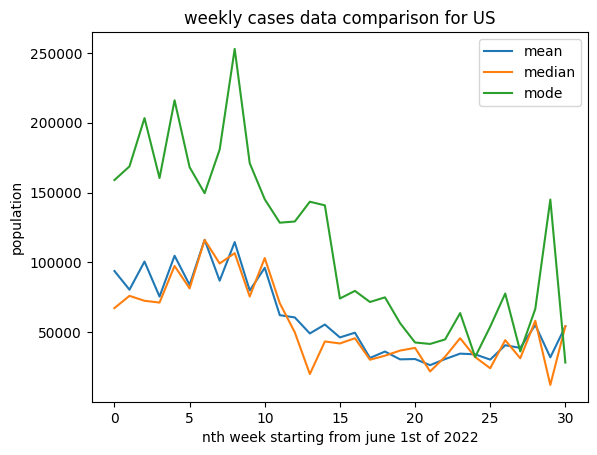

In [231]:
#first comparing the weekly statistics(means, median, mode) for number of new cases and deaths for US
plt.plot(US_weekly_cases_means, label='mean')
plt.plot(US_weekly_cases_medians, label='median')
plt.plot(US_weekly_cases_modes, label='mode')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly cases data comparison for US')

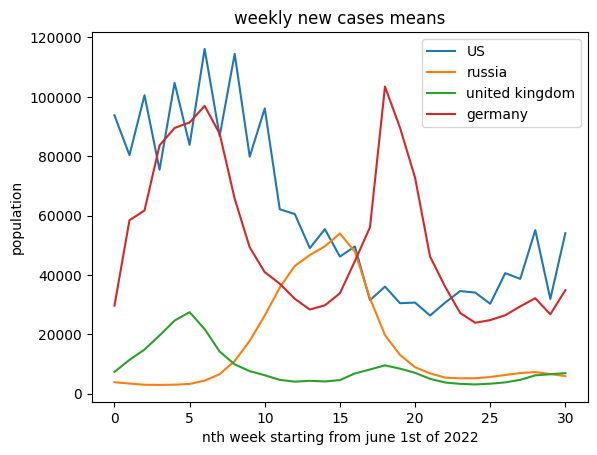

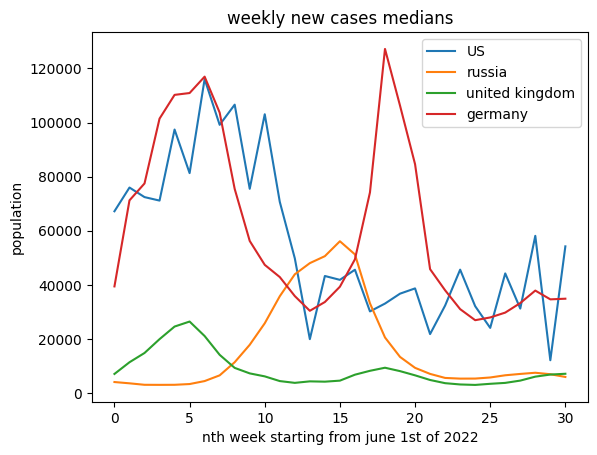

Text(0.5, 1.0, 'weekly new cases modes')

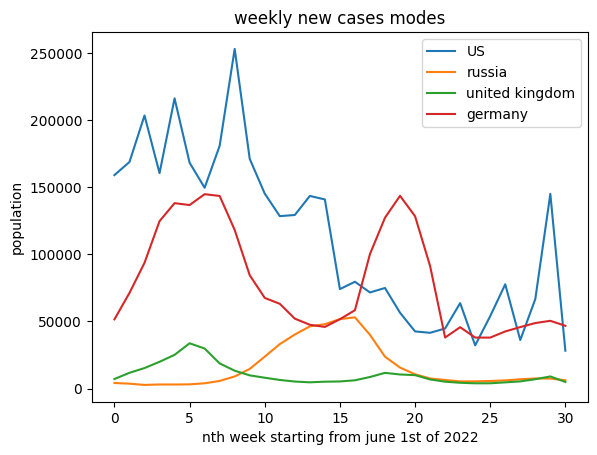

In [232]:
plt.plot(US_weekly_cases_means, label='US')
plt.plot(russia_weekly_cases_means, label='russia')
plt.plot(unitedkingdom_weekly_cases_means, label='united kingdom')
plt.plot(germany_weekly_cases_means, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new cases means')
plt.show()

plt.plot(US_weekly_cases_medians, label='US')
plt.plot(russia_weekly_cases_medians, label='russia')
plt.plot(unitedkingdom_weekly_cases_medians, label='united kingdom')
plt.plot(germany_weekly_cases_medians, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new cases medians')
plt.show()

plt.plot(US_weekly_cases_modes, label='US')
plt.plot(russia_weekly_cases_modes, label='russia')
plt.plot(unitedkingdom_weekly_cases_modes, label='united kingdom')
plt.plot(germany_weekly_cases_modes, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new cases modes')

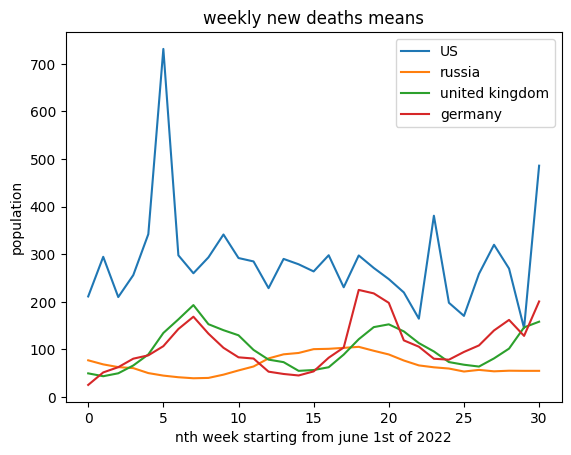

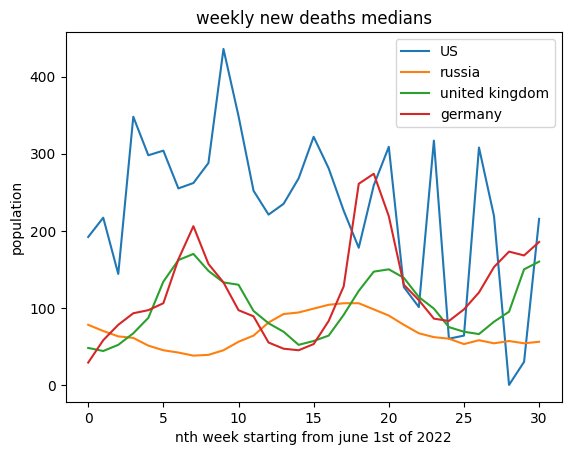

Text(0.5, 1.0, 'weekly new deaths modes')

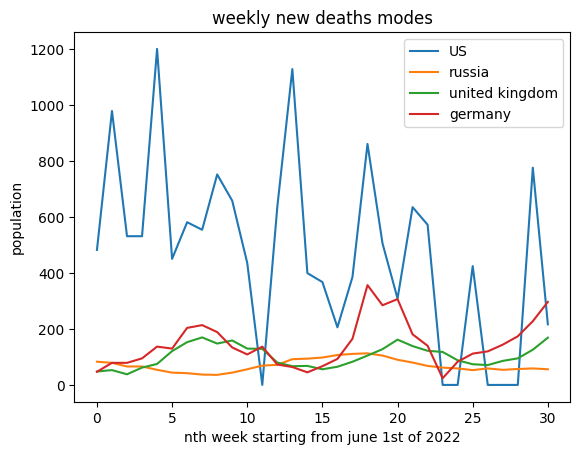

In [233]:
plt.plot(US_weekly_deaths_means, label='US')
plt.plot(russia_weekly_deaths_means, label='russia')
plt.plot(unitedkingdom_weekly_deaths_means, label='united kingdom')
plt.plot(germany_weekly_deaths_means, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new deaths means')
plt.show()

plt.plot(US_weekly_deaths_medians, label='US')
plt.plot(russia_weekly_deaths_medians, label='russia')
plt.plot(unitedkingdom_weekly_deaths_medians, label='united kingdom')
plt.plot(germany_weekly_deaths_medians, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new deaths medians')
plt.show()

plt.plot(US_weekly_deaths_modes, label='US')
plt.plot(russia_weekly_deaths_modes, label='russia')
plt.plot(unitedkingdom_weekly_deaths_modes, label='united kingdom')
plt.plot(germany_weekly_deaths_modes, label='germany')
plt.legend()
plt.ylabel('population')
plt.xlabel('nth week starting from june 1st of 2022')
plt.title('weekly new deaths modes')